# Annualized Return Pcnt

## Collective2 data

Use `Age > 90` for the daily data research compatibility.

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        3814      144745     -1.0000     -0.0686      0.1125  83980.5635      0.4154       1e+098865401.0855 


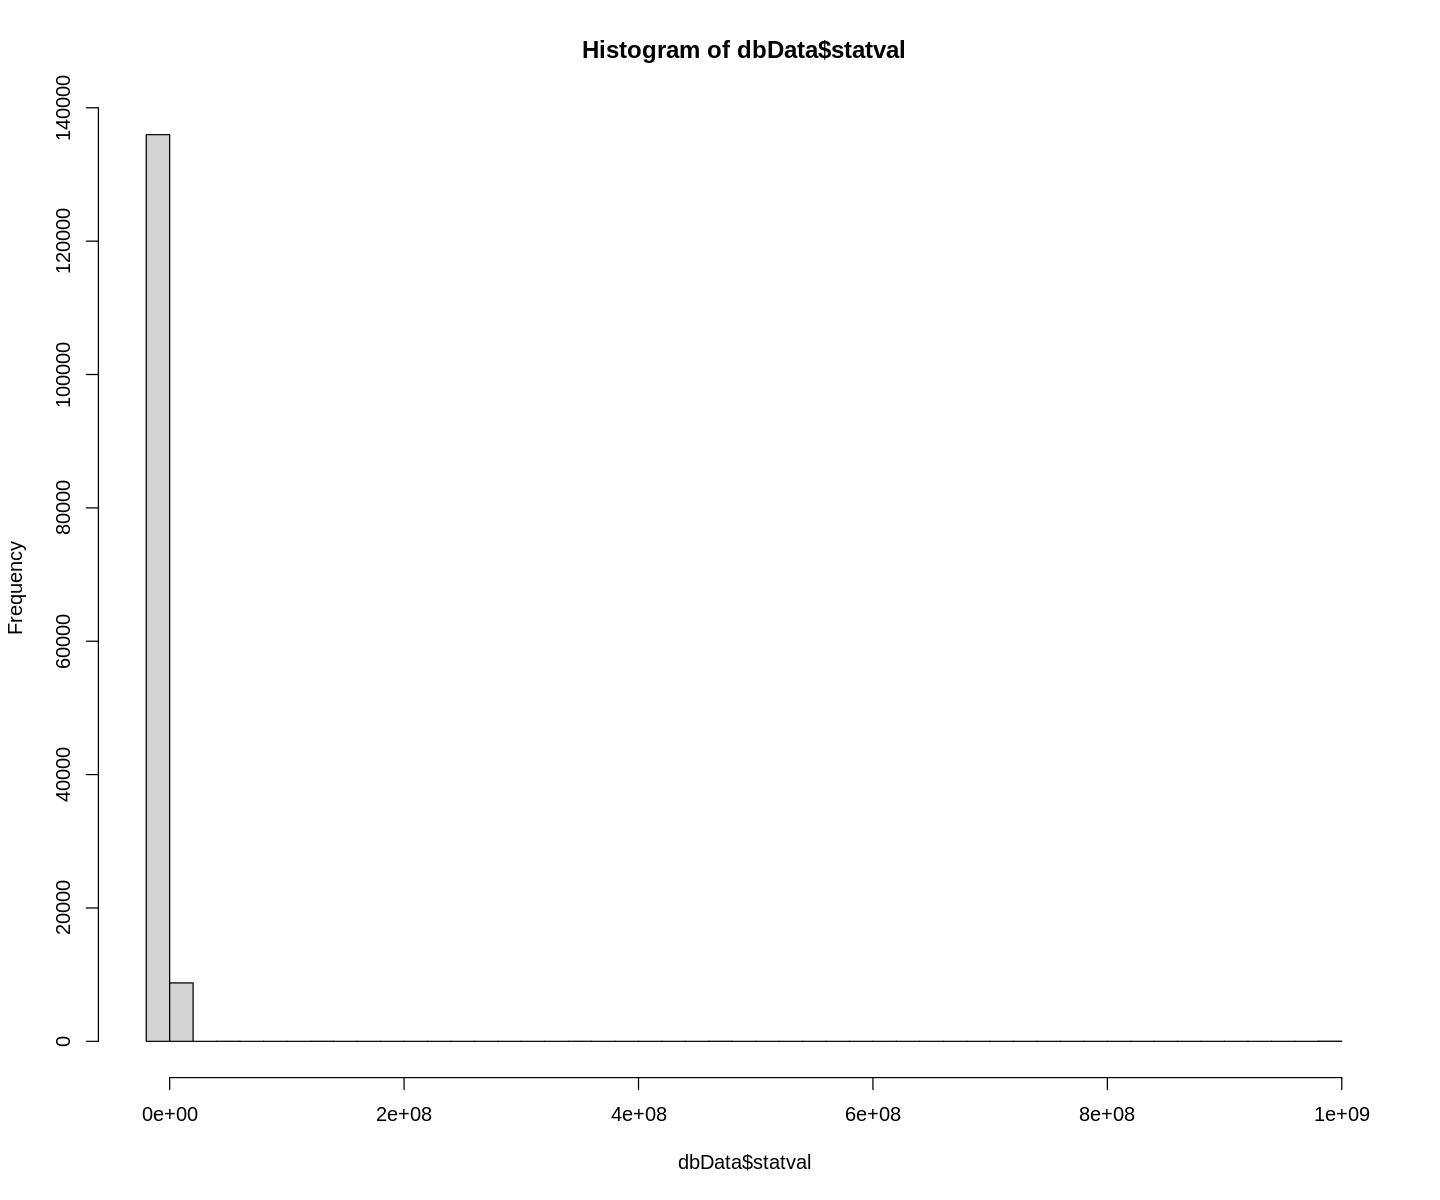

In [2]:
# What data we have.
sql = "select systemid, YYYYMMDD, statval
            from historical_stats_modern h
            join c2systems sys on sys.guid=h.systemid 
            where statname='cARdefault' 
                  and (DATEDIFF(cast(date_format(YYYYMMDD,'%Y%m%d') AS Date), Date(from_unixtime(added))) + 1) > 90"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

Based on the [previous investigation](./C2Score_AnnReturn_Crazy.ipynb), this statistics is not in percents.

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1881       57667      0.1000      0.1840      0.3050      0.3679      0.4968      1.0000      0.2260 


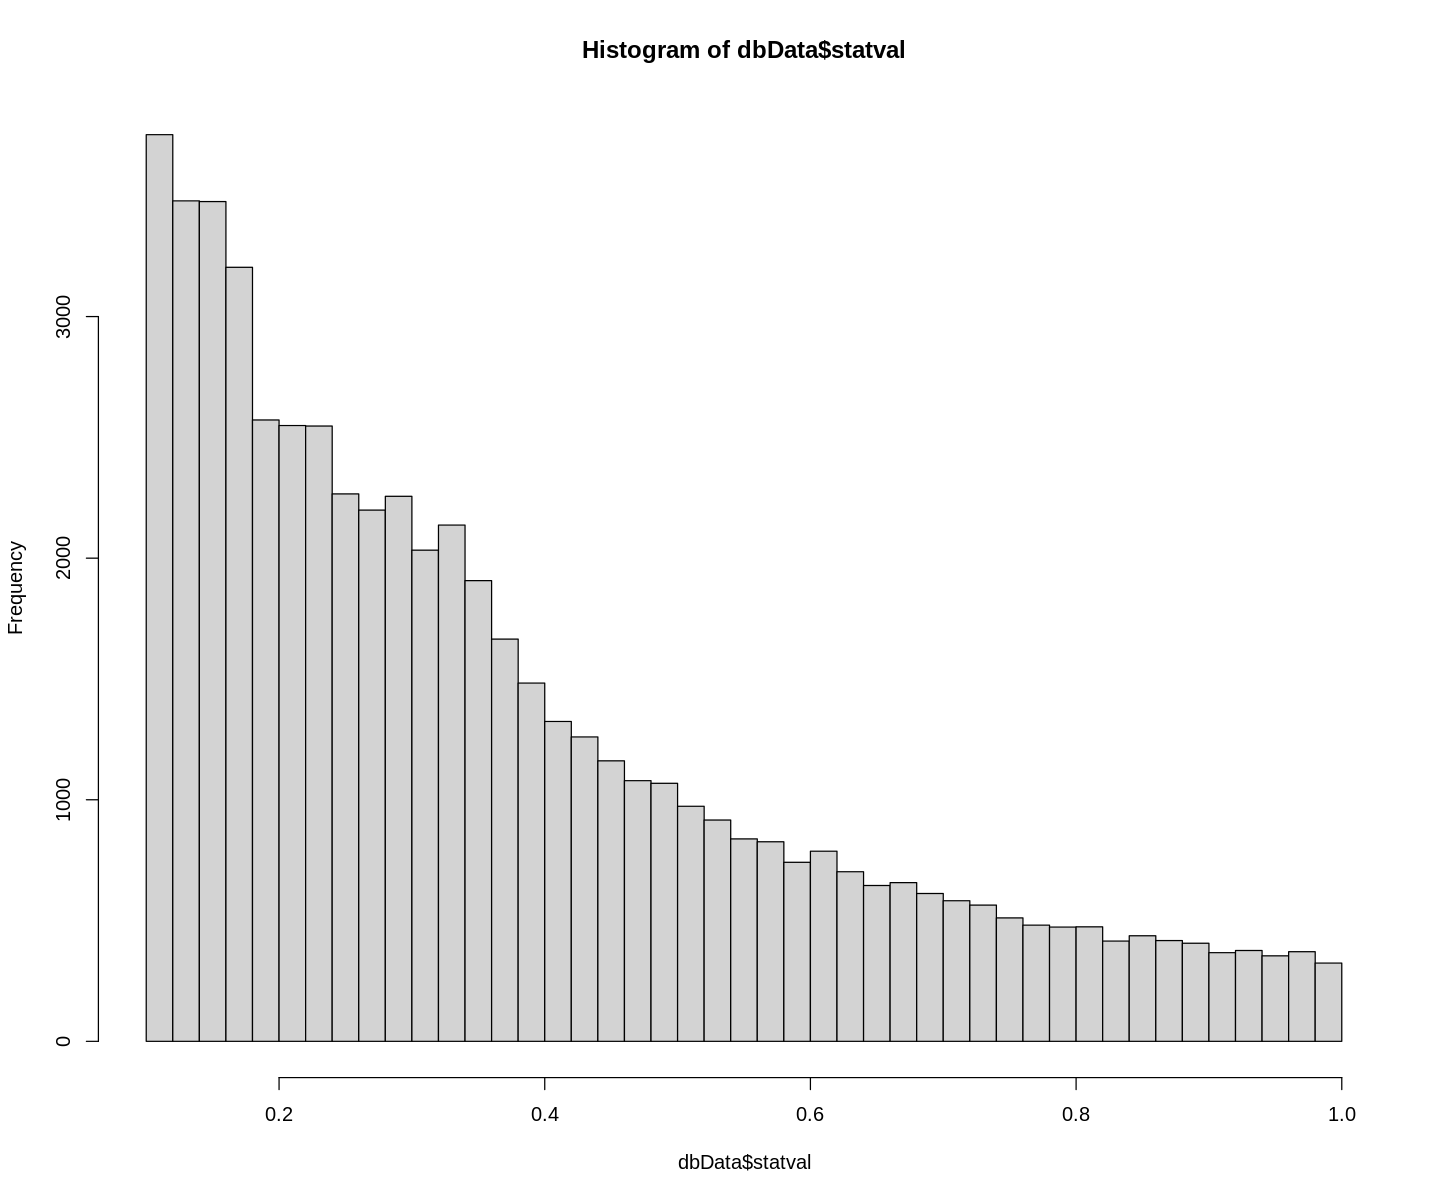

In [3]:
# Ann return between 10 and 100%

sql = "select systemid, YYYYMMDD, statval
            from historical_stats_modern h
            join c2systems sys on sys.guid=h.systemid 
            where statname='cARdefault' 
                  and (DATEDIFF(cast(date_format(YYYYMMDD,'%Y%m%d') AS Date), Date(from_unixtime(added))) + 1) > 90
                  and statval >= 0.1 and statval <= 1.0"
dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1064       26330      0.1000      0.1950      0.3176      0.3747      0.5049      1.0000      0.2230 


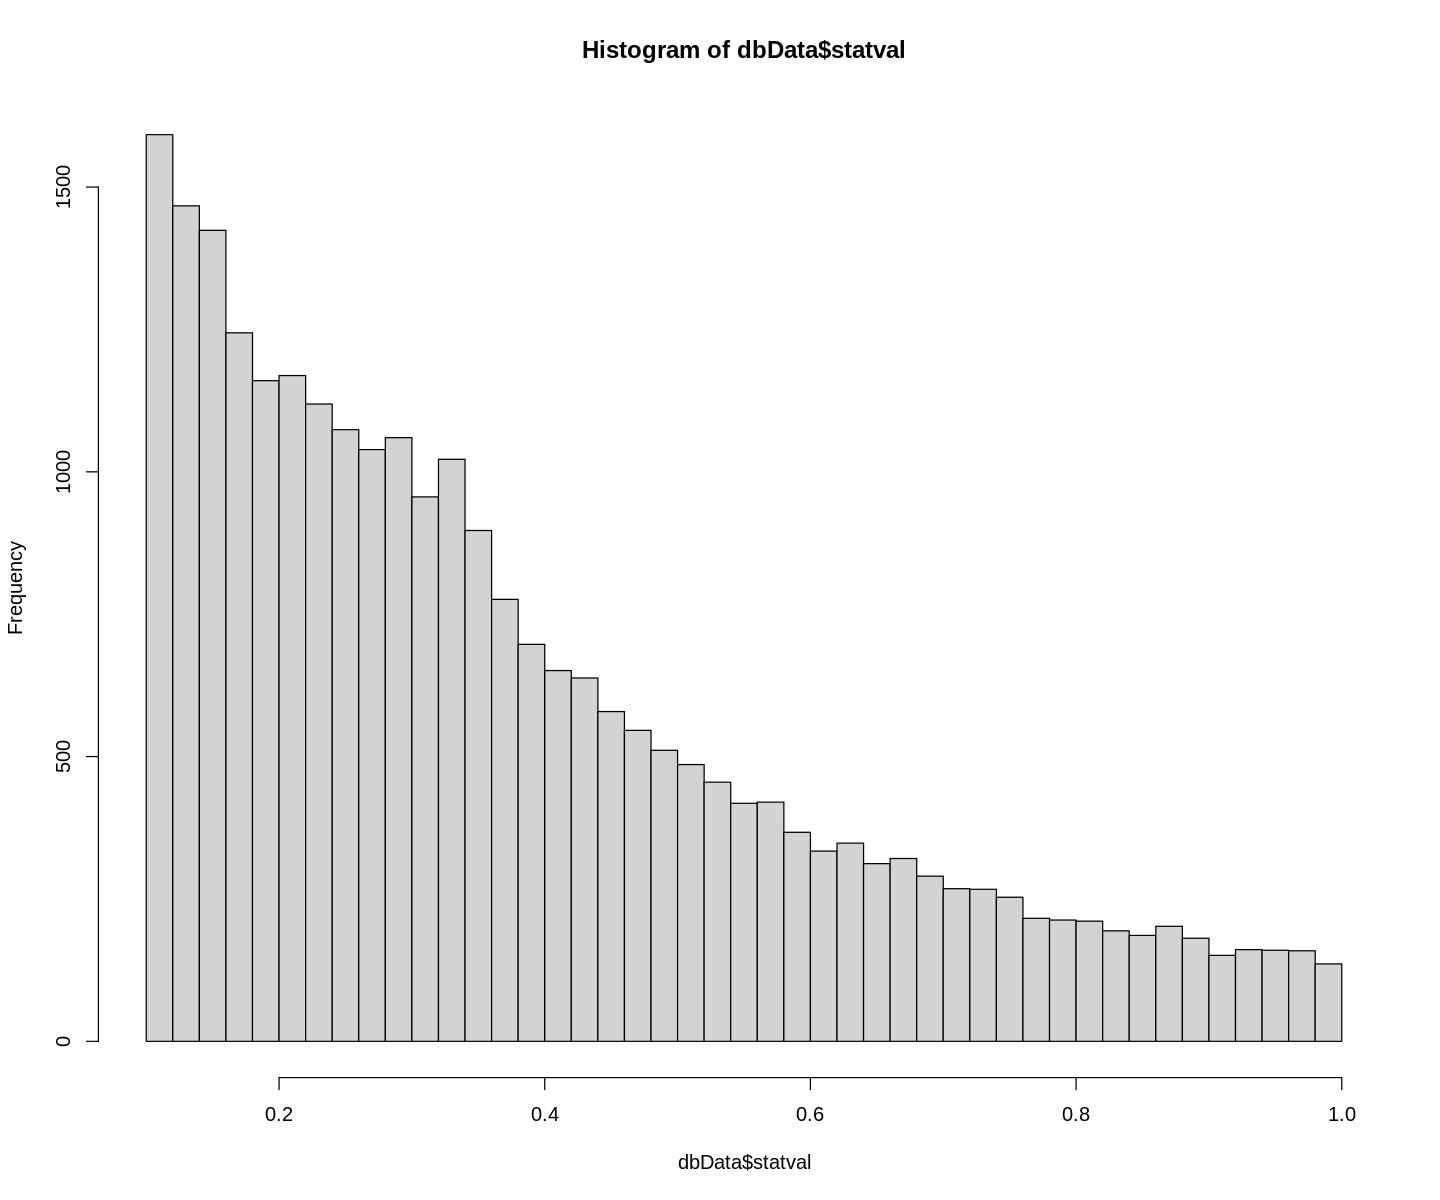

In [4]:
# Join with our cleaned data
sql = "select statval, eq.*
       from ReturnsDataInIntervalsCleanedSkip090 eq
       join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
       where statname='cARdefault' and statval >= 0.1 and statval <= 1.0 and Age > 90"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1064       26330      0.1000      0.1950      0.3176      0.3747      0.5049      1.0000      0.2230 



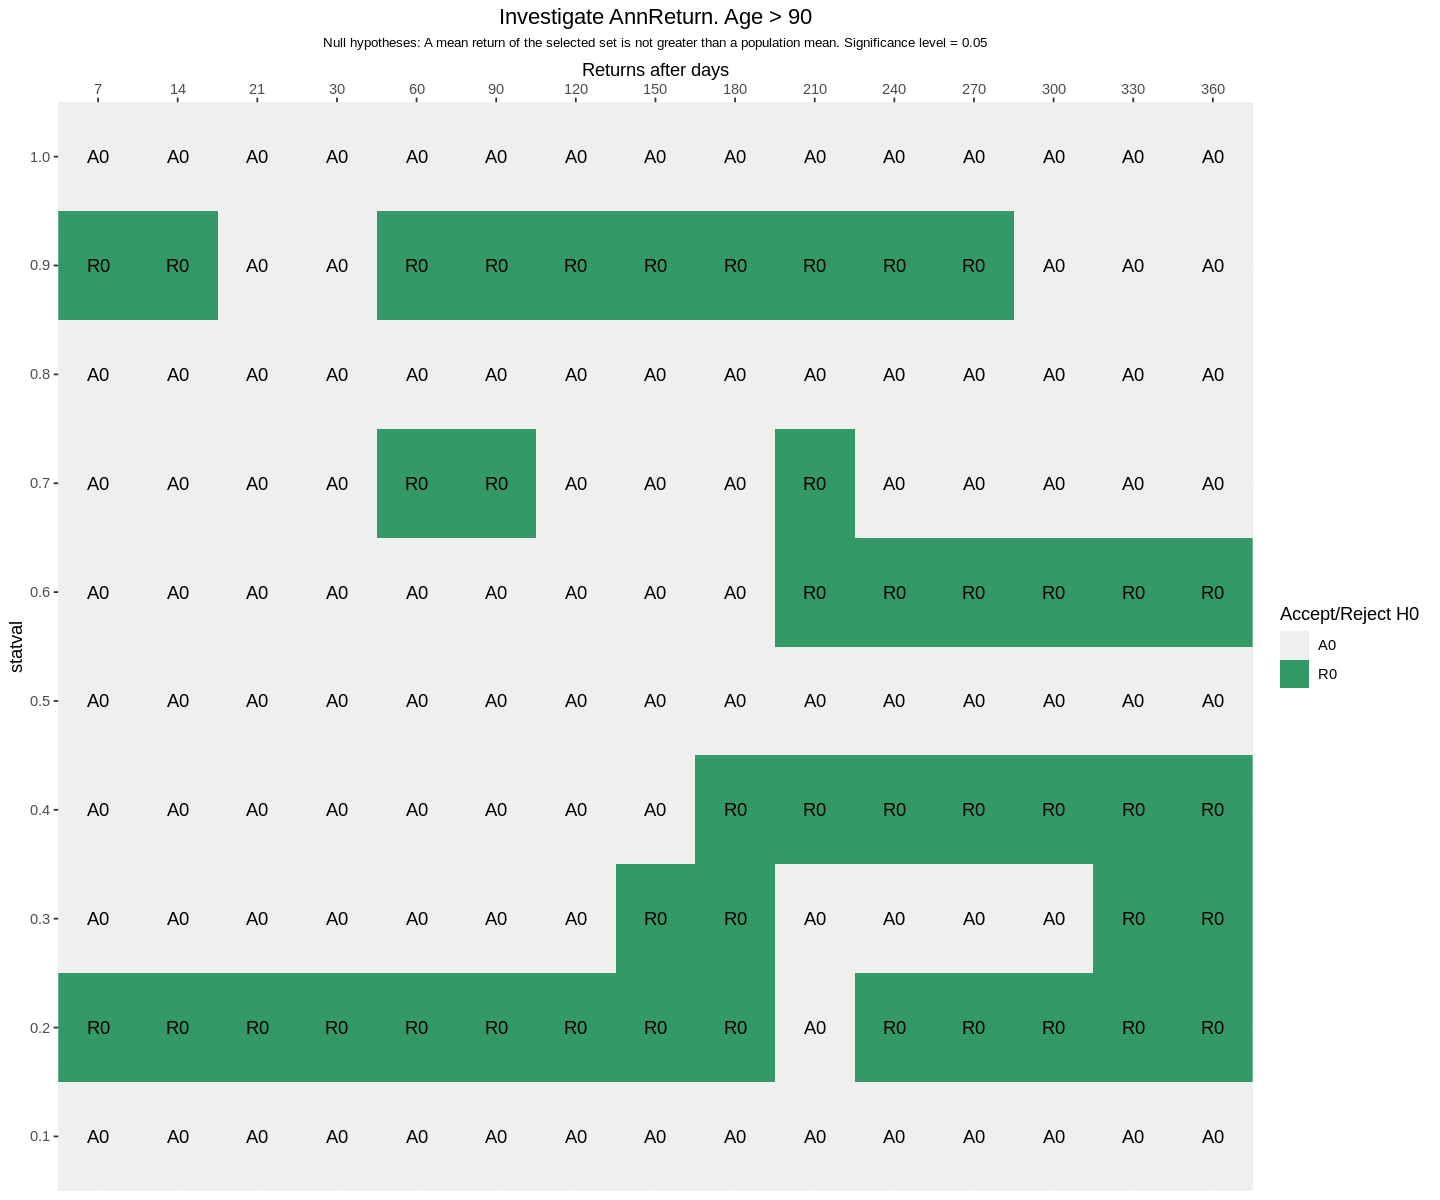

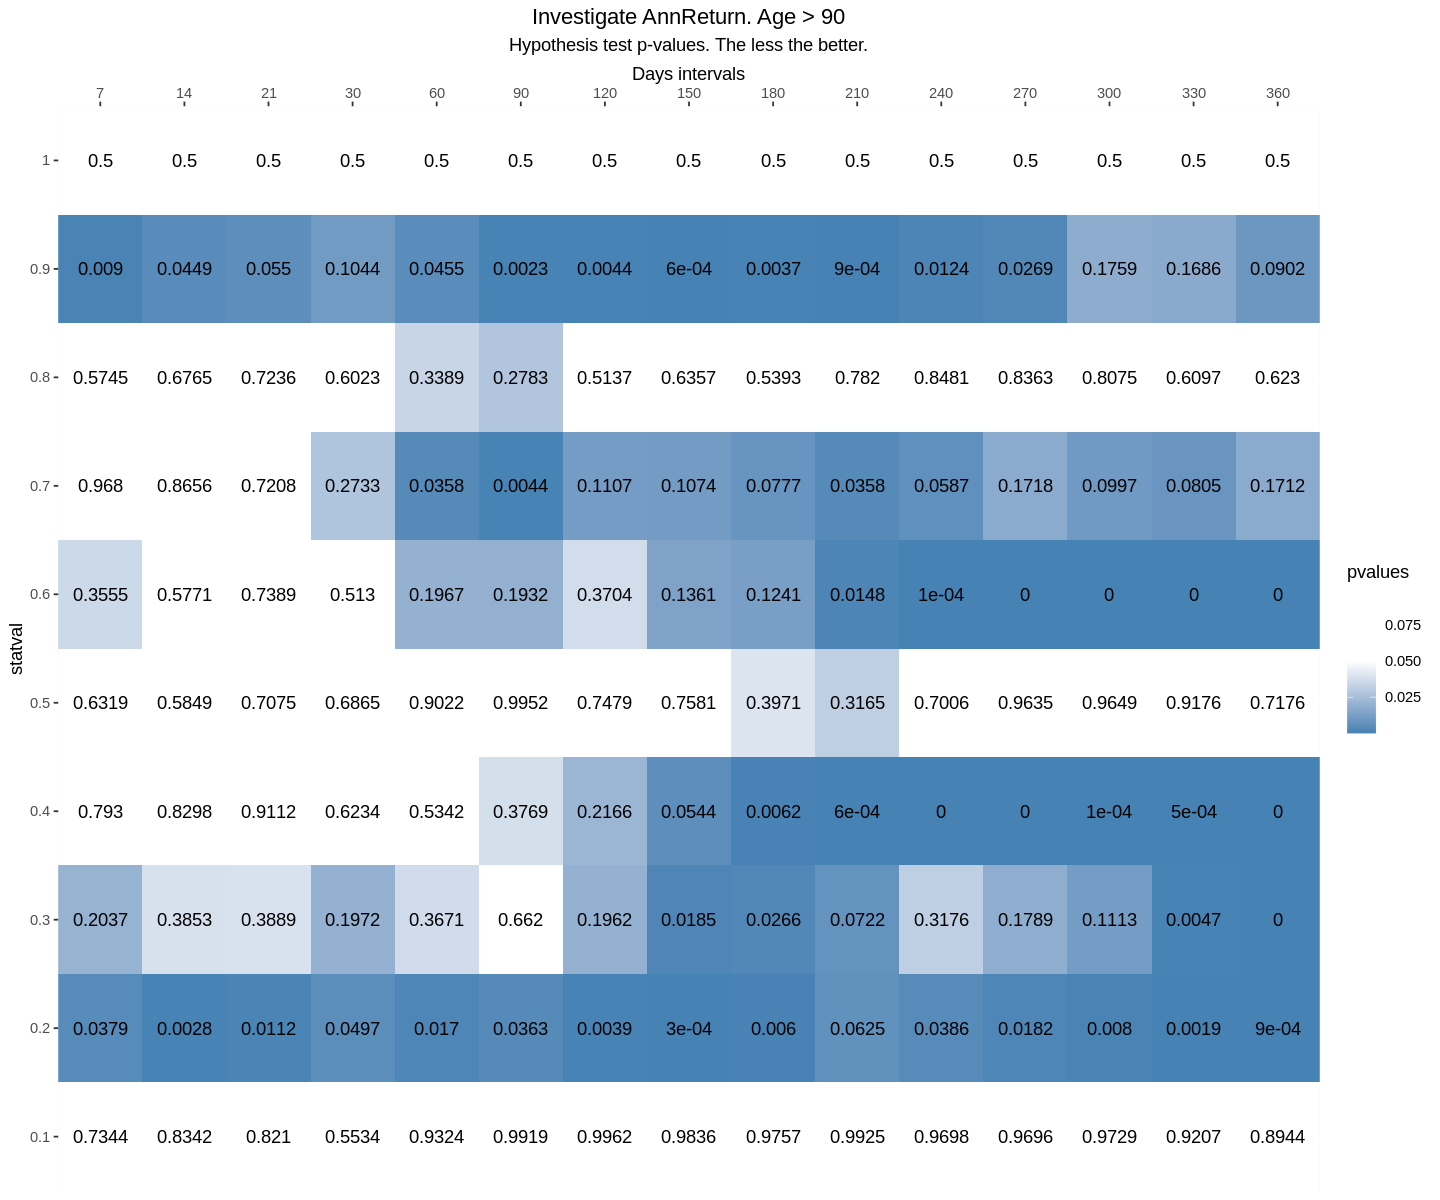

In [5]:
experiment = list(
  name = "Annualized Return Pcnt (C2 data, Age > 90)",
  description = "Investigate AnnReturn. Age > 90",
  sqlText = sql, # the latest sql above
  attributeName = "statval",
  attributeSteps = seq(from = 0.1, to = 1.0, by = 0.1),
  comparisonOperator = `>`)

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


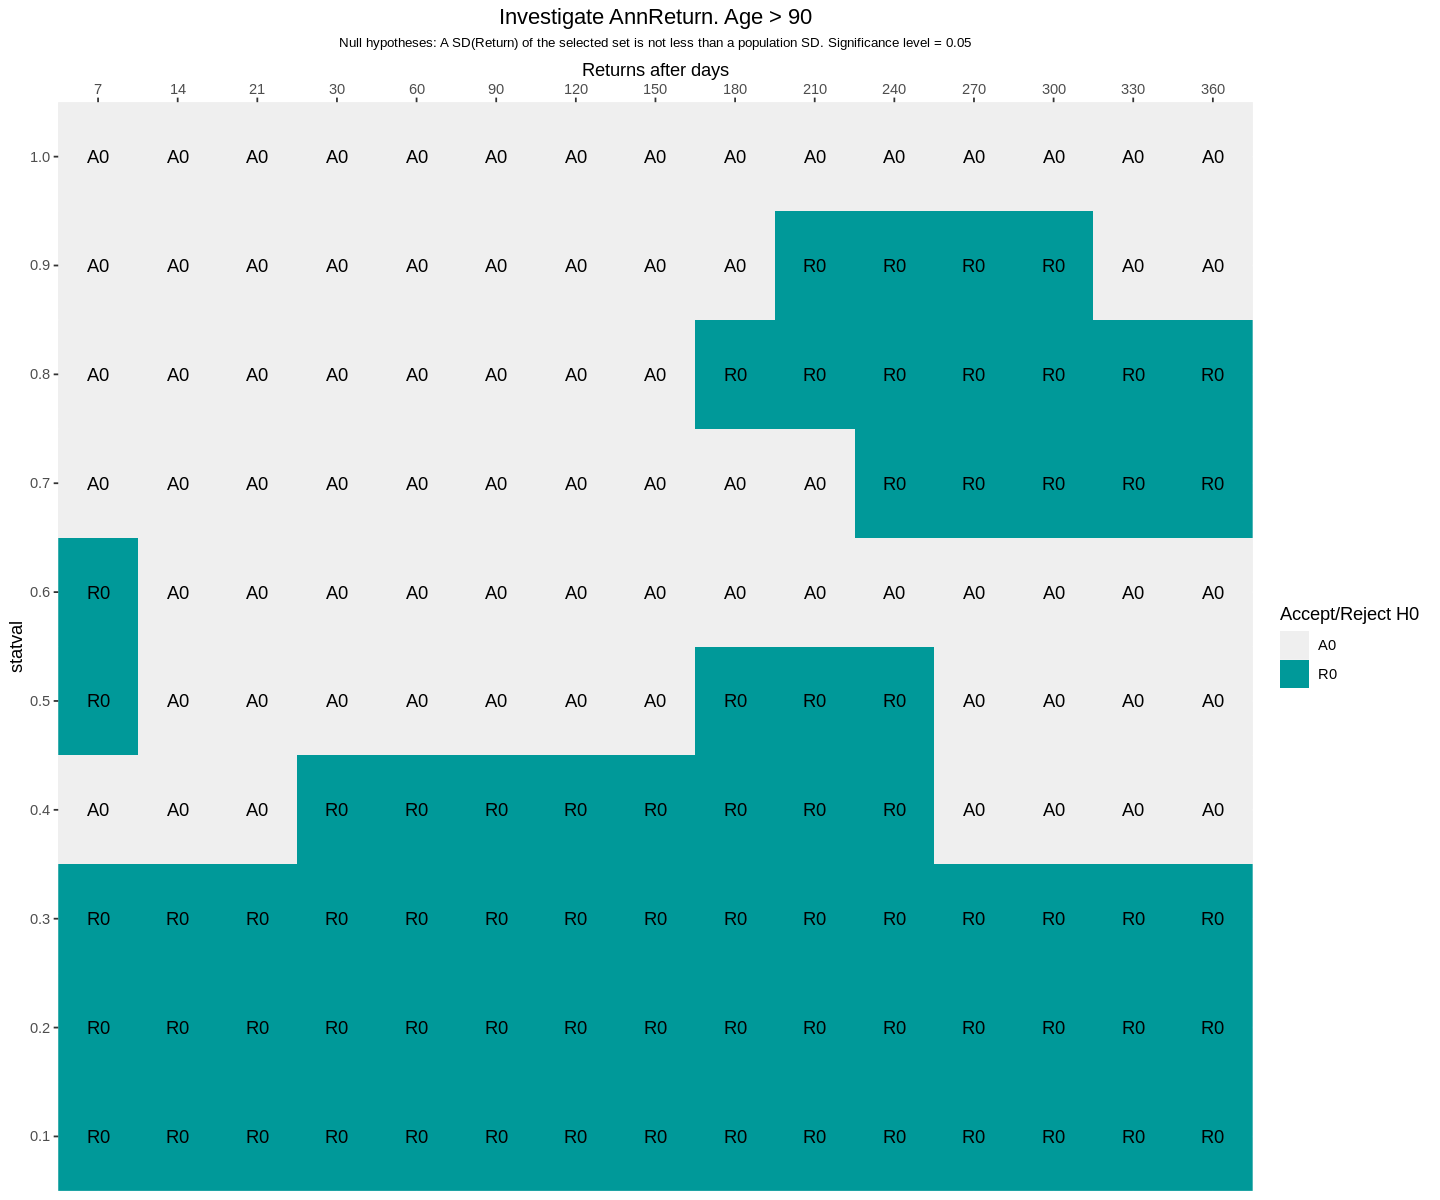

In [6]:
showSDLessHypothesisTest(experiment, result)

In [7]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9 <= statval < 1,754,744,738,722,663,593,535,480,417,377,350,317,299,269,231
0.8 <= statval < 0.9,956,940,925,903,824,734,658,599,545,499,437,385,344,300,268
0.7 <= statval < 0.8,1201,1187,1170,1144,1057,935,865,794,726,656,571,523,451,382,344
0.6 <= statval < 0.7,1583,1565,1538,1501,1398,1271,1163,1049,955,870,788,686,576,511,466
0.5 <= statval < 0.6,2109,2070,2039,2002,1835,1626,1429,1260,1098,989,871,755,694,645,591
0.4 <= statval < 0.5,2888,2846,2789,2712,2459,2201,1989,1783,1592,1422,1282,1198,1130,1053,984
0.3 <= statval < 0.4,4286,4230,4169,4098,3781,3373,3017,2716,2440,2235,2058,1899,1740,1632,1530
0.2 <= statval < 0.3,5369,5265,5169,5034,4603,4127,3693,3360,3067,2803,2544,2301,2064,1887,1729
0.1 <= statval < 0.2,6728,6573,6444,6281,5698,5074,4578,4104,3675,3340,3030,2753,2524,2327,2150



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



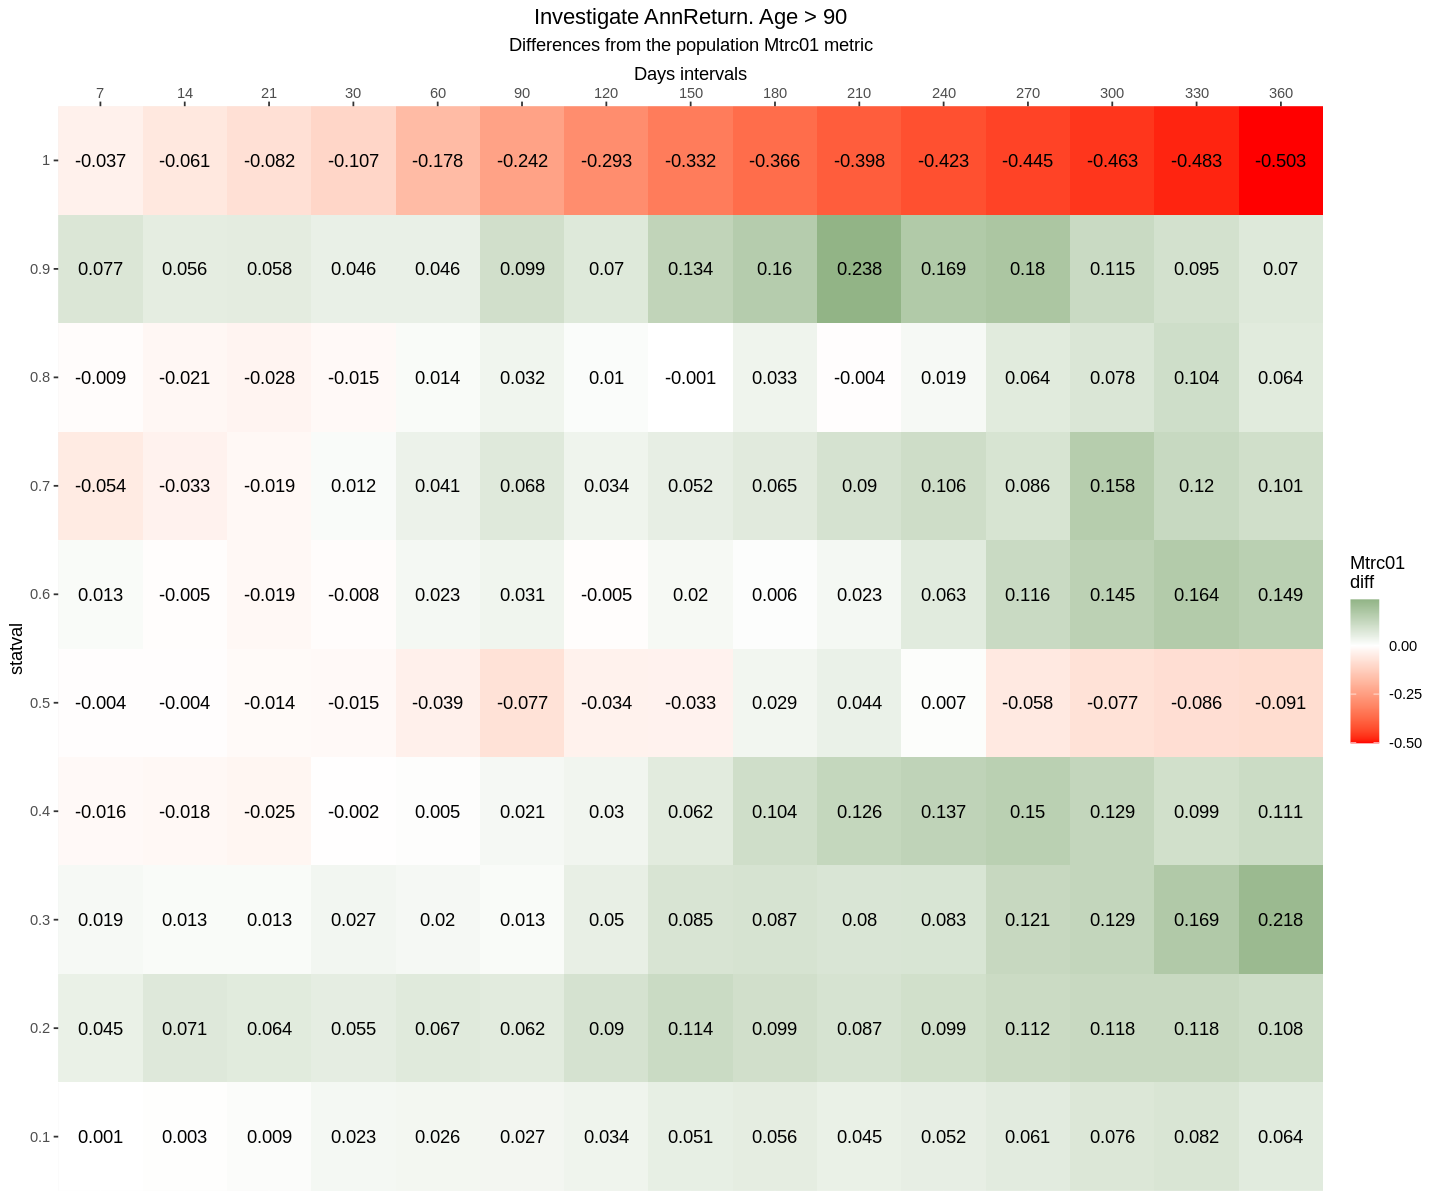

In [8]:
showMetricDifferences(experiment, result)

In [9]:
showSystemsCounts(experiment, result) 



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9 <= statval < 1,250,243,242,236,211,184,169,155,131,119,105,91,82,74,67
0.8 <= statval < 0.9,284,276,269,260,233,206,181,161,139,130,113,101,87,74,64
0.7 <= statval < 0.8,315,305,301,286,257,220,198,174,153,140,116,109,96,81,70
0.6 <= statval < 0.7,369,361,350,337,300,269,240,213,188,164,144,128,110,99,87
0.5 <= statval < 0.6,432,418,407,399,349,302,267,228,194,171,150,126,116,102,91
0.4 <= statval < 0.5,496,485,475,458,394,337,298,266,233,196,164,144,132,119,104
0.3 <= statval < 0.4,544,527,512,494,432,377,321,290,246,209,189,169,142,128,117
0.2 <= statval < 0.3,579,556,545,526,465,403,348,296,262,231,205,179,157,144,134
0.1 <= statval < 0.2,641,603,589,568,476,406,360,314,273,239,211,186,167,153,137


### Discussion

..................... (The same as in daily data?)

## Age > 180

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
         657       20718      0.1000      0.1897      0.3060      0.3625      0.4831      1.0000      0.2156 


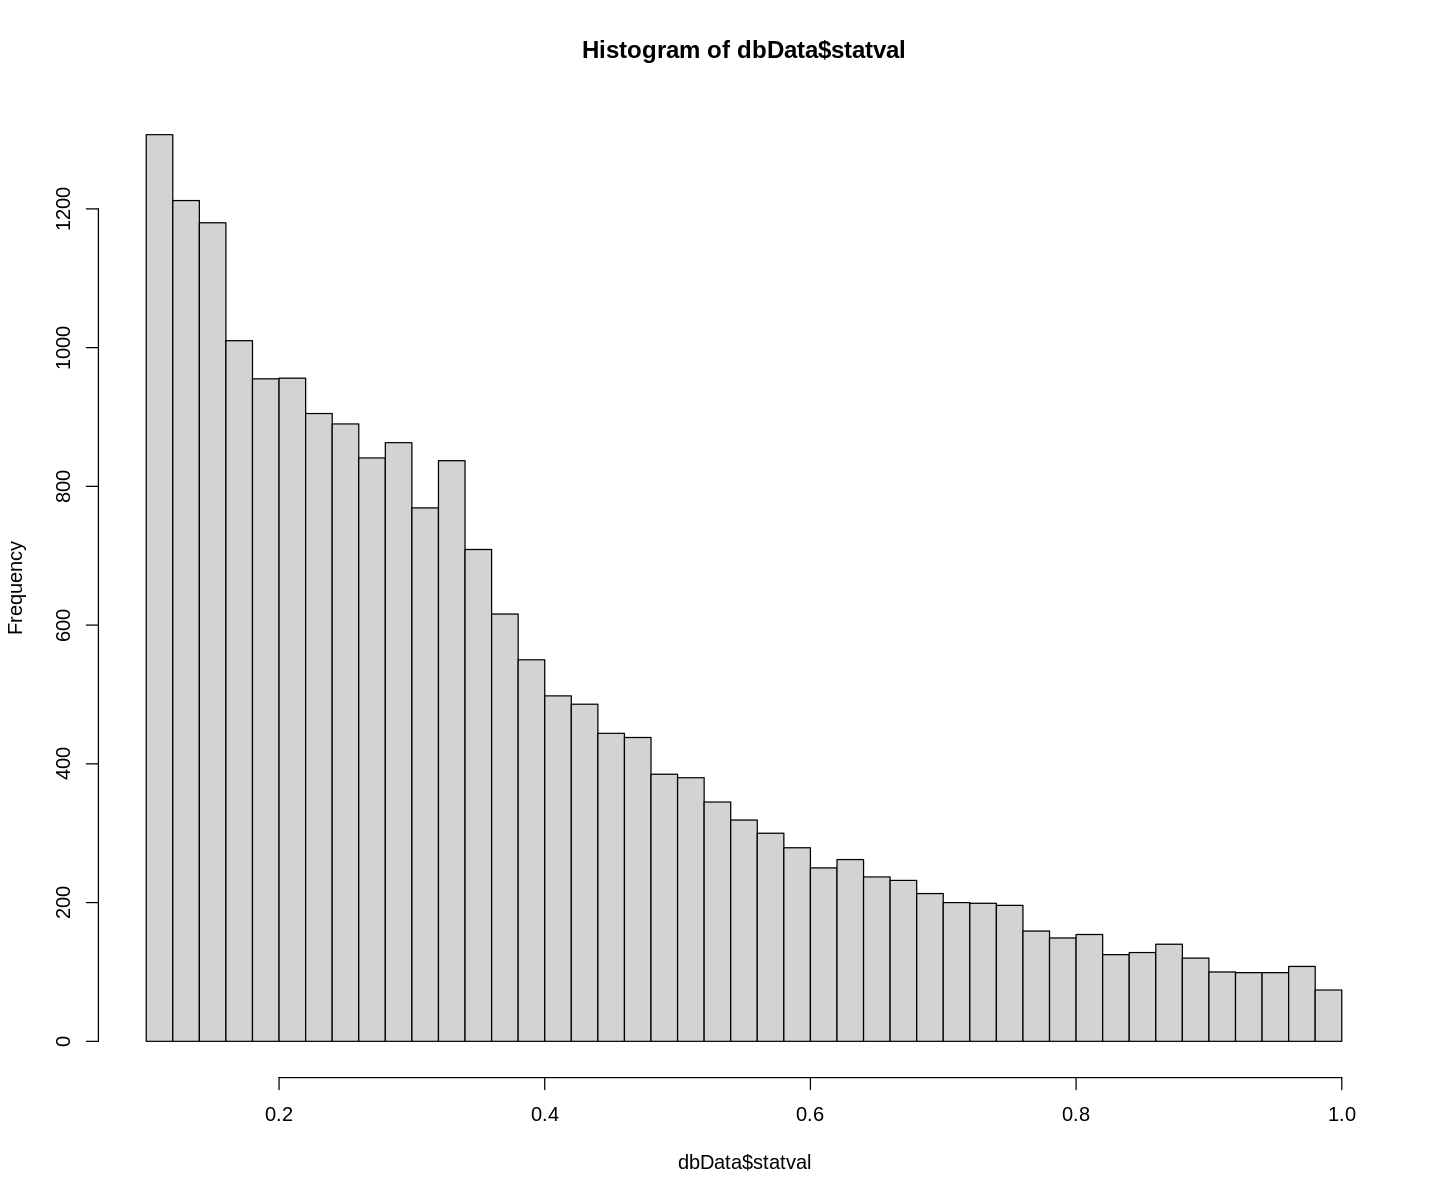

In [10]:
sql = "select statval, eq.*
       from ReturnsDataInIntervalsCleanedSkip090 eq
       join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
       where statname='cARdefault' and statval >= 0.1 and statval <= 1.0 and Age > 180"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
         657       20718      0.1000      0.1897      0.3060      0.3625      0.4831      1.0000      0.2156 



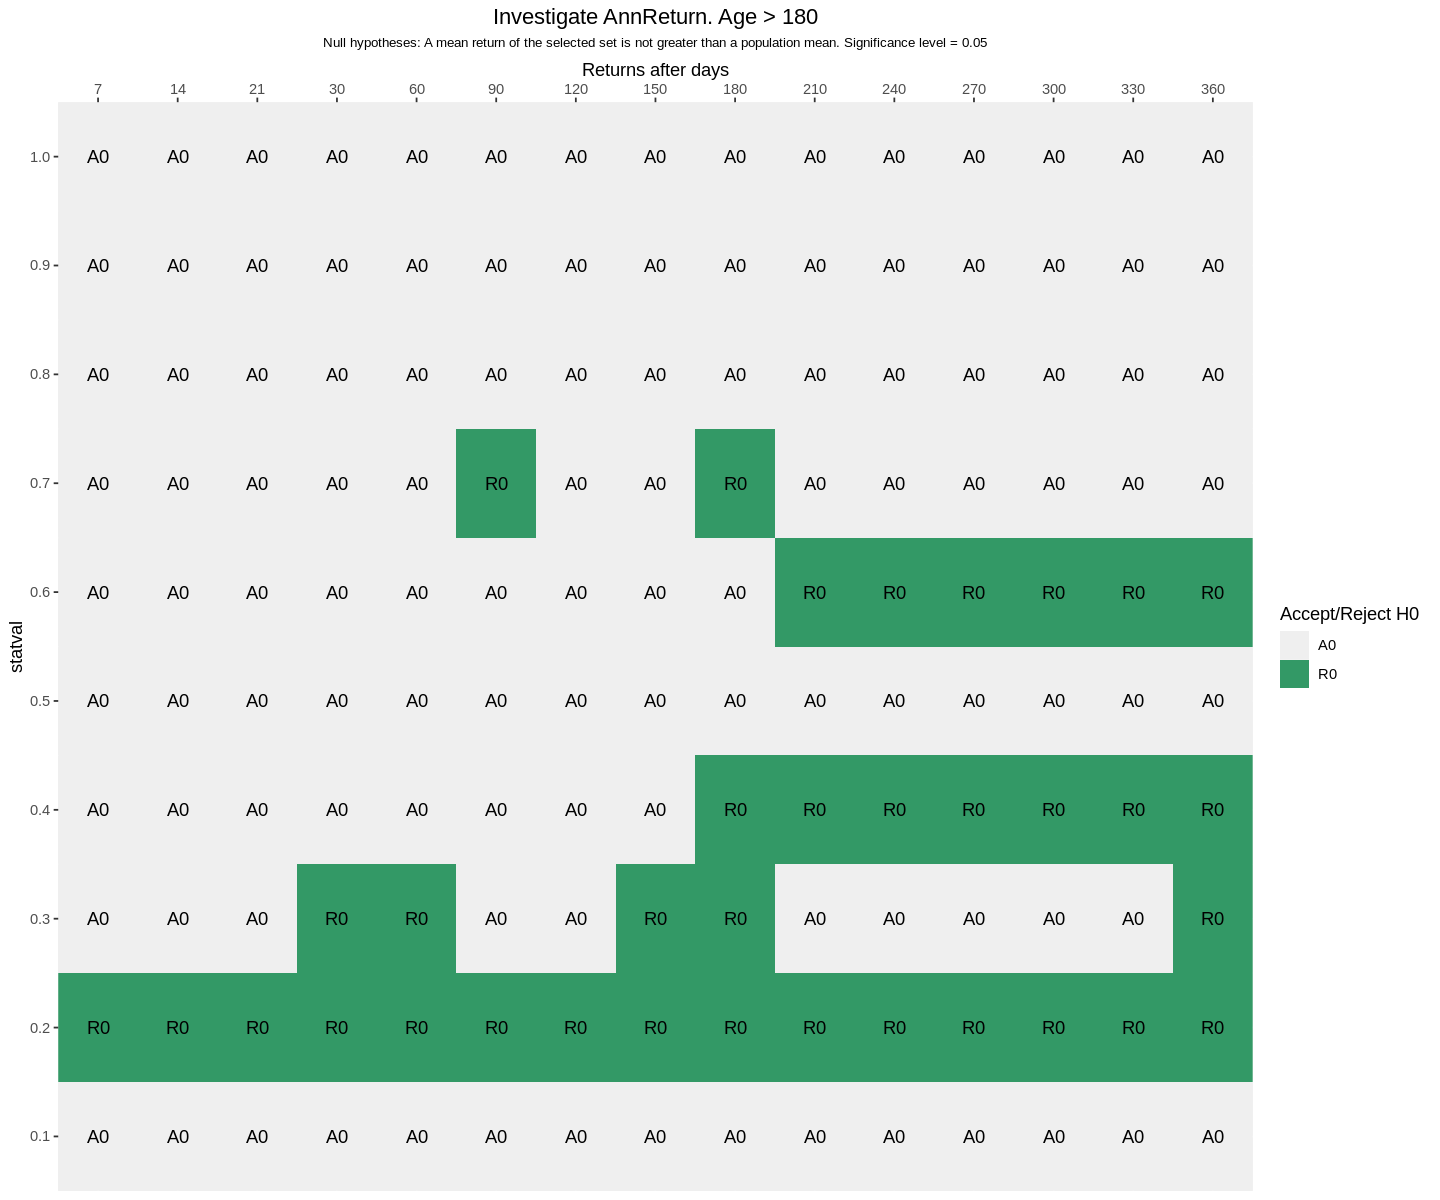

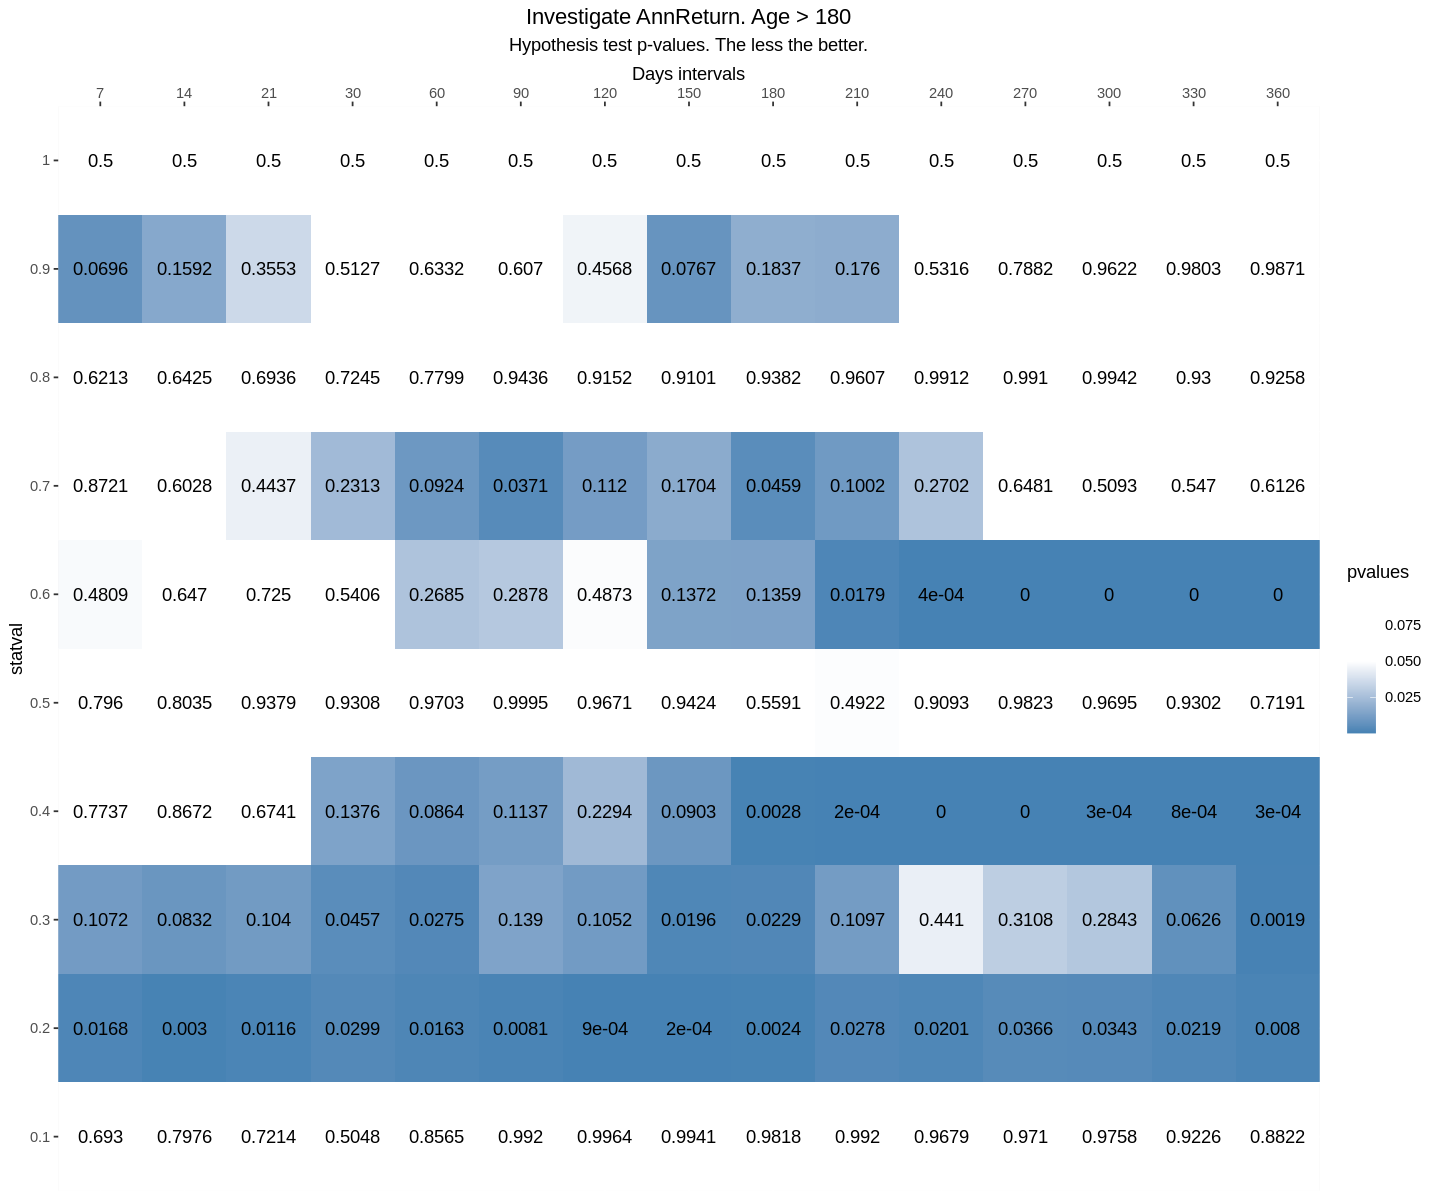

In [11]:
experiment = list(
  name = "Annualized Return Pcnt (C2 data, Age > 180)",
  description = "Investigate AnnReturn. Age > 180",
  sqlText = sql, # the latest sql above
  attributeName = "statval",
  attributeSteps = seq(from = 0.1, to = 1.0, by = 0.1),
  comparisonOperator = `>`)

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


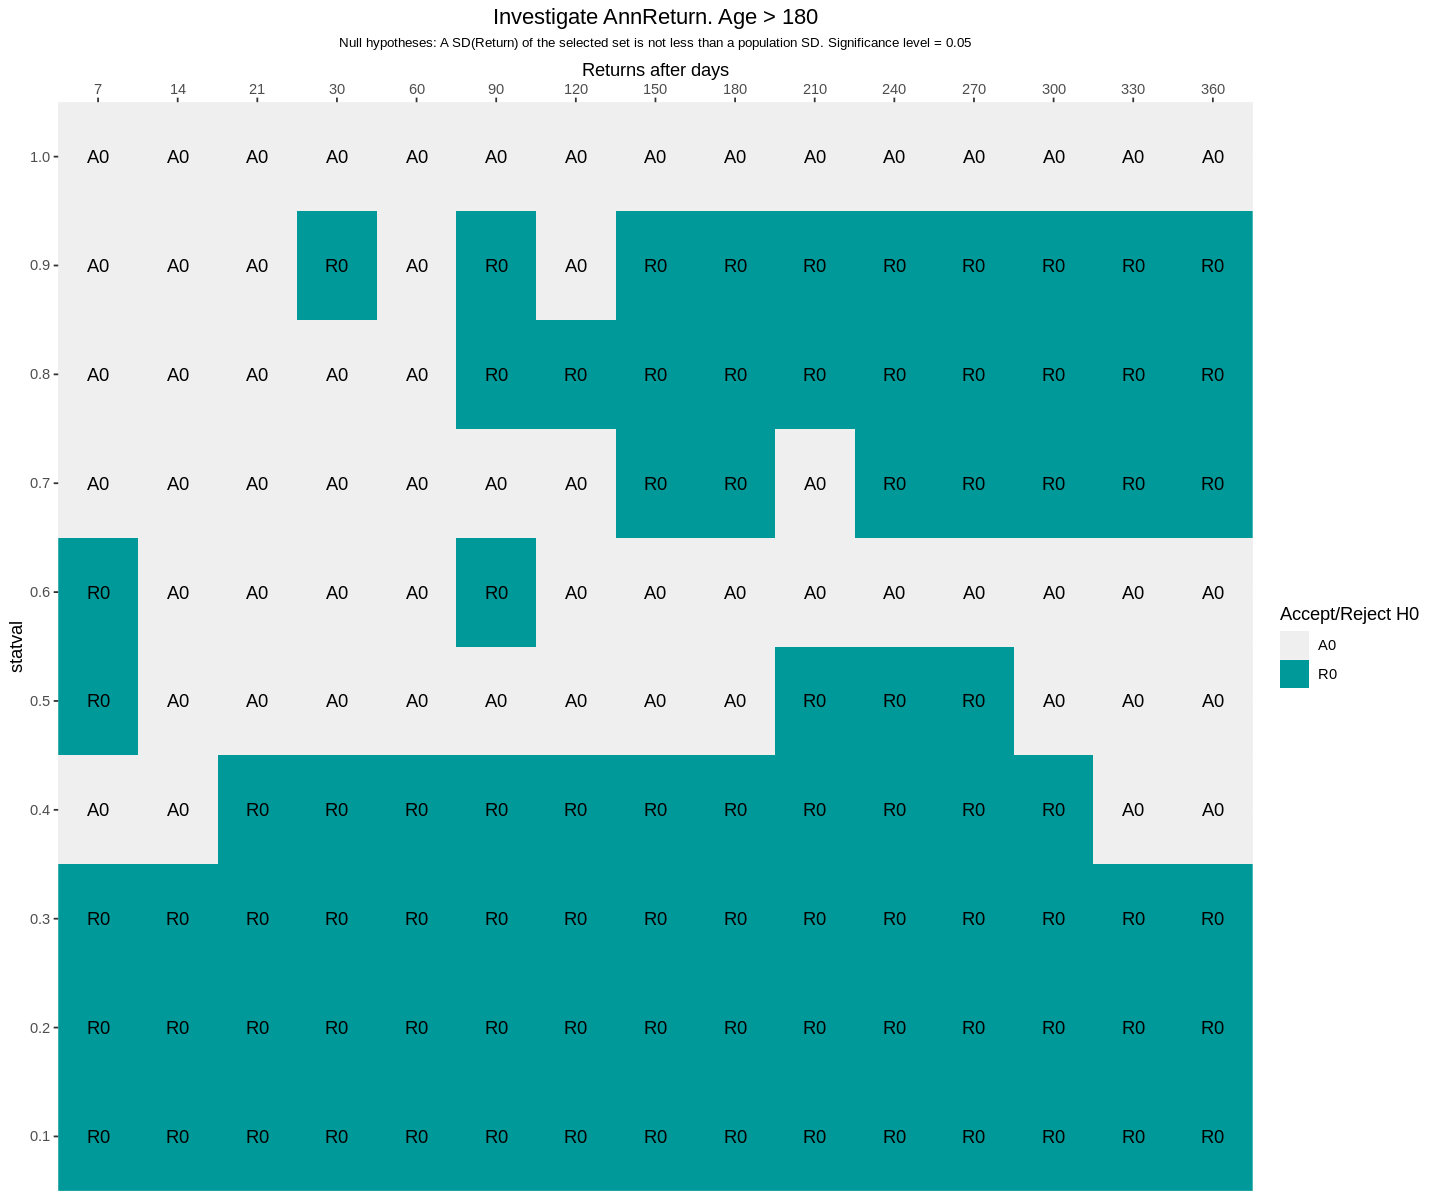

In [12]:
showSDLessHypothesisTest(experiment, result)

In [13]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9 <= statval < 1,474,472,469,461,431,392,348,310,266,238,222,205,197,178,154
0.8 <= statval < 0.9,658,650,645,634,586,529,473,434,401,364,324,291,265,236,214
0.7 <= statval < 0.8,896,891,882,872,822,733,680,630,576,524,464,430,373,321,292
0.6 <= statval < 0.7,1189,1177,1164,1140,1078,986,911,819,748,687,634,556,471,418,384
0.5 <= statval < 0.6,1598,1575,1554,1527,1425,1272,1121,993,869,788,701,622,576,543,501
0.4 <= statval < 0.5,2226,2198,2160,2112,1953,1752,1606,1454,1317,1190,1092,1032,982,924,869
0.3 <= statval < 0.4,3437,3402,3362,3313,3090,2782,2519,2282,2060,1908,1761,1644,1533,1443,1359
0.2 <= statval < 0.3,4384,4310,4244,4145,3830,3473,3158,2893,2645,2431,2234,2033,1823,1664,1514
0.1 <= statval < 0.2,5557,5456,5358,5239,4806,4308,3907,3529,3175,2904,2651,2436,2246,2072,1918



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



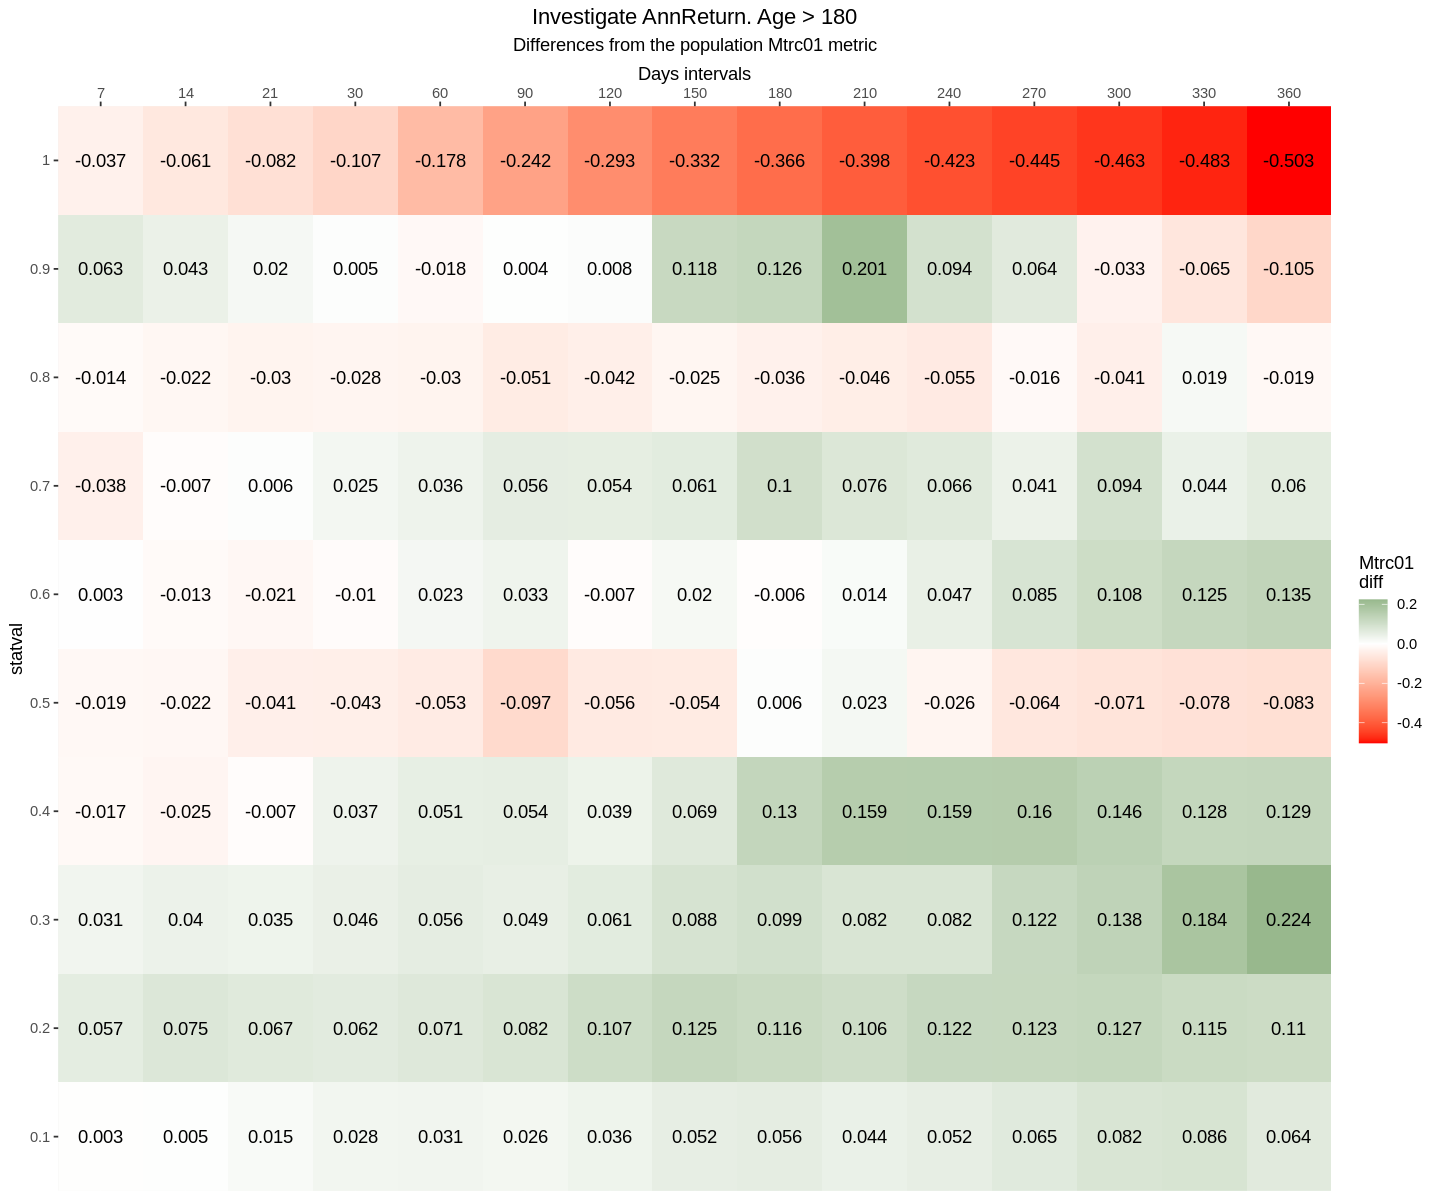

In [14]:
showMetricDifferences(experiment, result)

In [15]:
showSystemsCounts(experiment, result) 



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9 <= statval < 1,132,131,131,129,118,110,99,92,75,65,57,51,49,44,40
0.8 <= statval < 0.9,154,151,150,148,134,123,109,97,89,81,71,65,59,51,47
0.7 <= statval < 0.8,186,185,184,178,171,149,133,122,107,101,83,82,75,63,57
0.6 <= statval < 0.7,214,210,208,202,189,170,154,131,117,104,97,87,77,66,60
0.5 <= statval < 0.6,241,237,233,226,207,182,165,145,127,114,102,90,80,74,66
0.4 <= statval < 0.5,285,279,274,265,244,202,190,172,150,126,106,96,90,82,73
0.3 <= statval < 0.4,324,318,310,302,270,234,211,192,157,137,119,112,98,90,83
0.2 <= statval < 0.3,367,359,355,343,308,260,225,202,180,158,143,127,110,102,95
0.1 <= statval < 0.2,412,395,386,374,324,270,240,211,180,163,145,131,120,109,100


### Discussion

..............